# **Análisis, Visualización y Curación de Datos**

# Consigna 1

#### Caracterizar a los tutores en términos de edad, sexo y país. Para el caso de la edad, determinar si los datos siguen alguna alguna distribución conocida. Para el sexo, determinar si hay una diferencia significativa entre hombres y mujeres. Graficar.

## Importación de modulos
---


In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from columns_to_keep import C2K
from type_to_fix import T2F

## Carga de la tabla de metadata
---

In [58]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'datadump-20150801-20171219.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name)
display(df.shape)

(63265, 111)

### Preprocesamiento o curación de la metadata

In [59]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Tomo solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

display(df.shape)

(63265, 39)

## Carga la tabla de mensajes preprocesados
---

In [60]:
data_file_name = 'tiny_yup_messages_preprocessed.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
dfd = pd.read_csv(full_data_file_name)
display(dfd.shape)

(7441, 6)

### Descripción inicial de los datos
---
Los datos sobre los que trabajaremos para caracterizar los tutores son aquellos en los que el tutor está identificado. Estos representan $\approx$ 92.49% de los datos del dataset. 

In [61]:
# Obtenemos la cantidad de filas con tutor sin identificación (tutor_id nulo)
nrows_tutor_nan  = df['tutor_id'].isnull().sum()

# Cantidad de filas total
nrows = df.shape[0]

# Cantidad de tutores identificados
n_tutors = df.dropna(subset=['tutor_id'])['tutor_id'].unique().shape[0]


print ('Cantidad de filas con tutor no identificado: {} de {}'.format(nrows_tutor_nan,nrows))
print ('Porcentaje de filas con tutor identificado: {:.2%}'.format(1 - nrows_tutor_nan/nrows))
print ('Porcentaje de filas con tutor no identificado: {:.2%}'.format(nrows_tutor_nan/nrows))
print ('Cantidad de tutores (identificados): {}'.format(n_tutors))

Cantidad de filas con tutor no identificado: 4749 de 63265
Porcentaje de filas con tutor identificado: 92.49%
Porcentaje de filas con tutor no identificado: 7.51%
Cantidad de tutores (identificados): 149


### Caracterización de los tutores: Género

1. Tomamos las columnas que vamos a usar en el análisis, descartando las filas cuyo tutor no está identificado
2. Creamos un data frame con los datos del género por tutor, descartando los valores de género no definido
3. Calculamos totales por género

In [62]:
# 1
df_tutors = df.dropna(subset=['tutor_id'])[['tutor_id', 'tutor_gender', 'tutor_age','tutor_last_sign_in_country']]

# 2
df_tutors_by_gender = df_tutors.dropna(subset=['tutor_gender'])
df_tutors_by_gender = df_tutors_by_gender.drop_duplicates().sort_values(by='tutor_id')

# 3
total= df_tutors_by_gender.tutor_id.count()

n_male= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'male')].tutor_id.count()
n_female= df_tutors_by_gender[(df_tutors_by_gender.tutor_gender == 'female')].tutor_id.count()

print ('Cantidad de tutores hombres: {}'.format(n_male))
print ('Cantidad de tutores mujeres: {}'.format(n_female))

print ('Porcentaje de tutores hombres: {:.2%}'.format(n_male/total))
print ('Porcentaje de tutores mujeres: {:.2%}'.format(n_female/total))


Cantidad de tutores hombres: 93
Cantidad de tutores mujeres: 43
Porcentaje de tutores hombres: 68.38%
Porcentaje de tutores mujeres: 31.62%


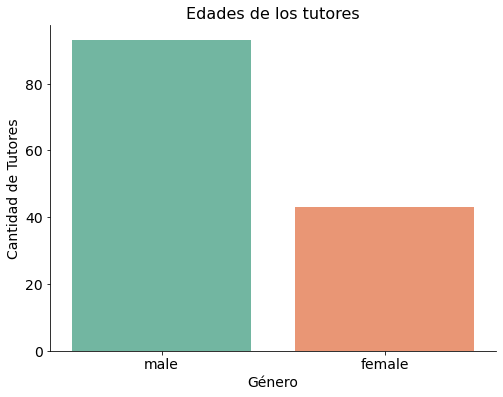

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = df_tutors_by_gender['tutor_gender'], palette='Set2')
ax.set_title('Edades de los tutores', fontsize=16)
plt.title = 'Cantidad de tutores por género'
plt.xlabel('Género', fontsize=14)
plt.ylabel('Cantidad de Tutores', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

### Caracterización de los tutores: Distribución geográfica

1. Importamos la librería necesaria para estandarizar el nombre y códigos de los países
2. Removemos las filas con información nula en country
3. Removemos las filas con información no definida ('--') en country
4. Agregamos una columna con el código y el nombre del país normalizados
5. Totalizamos por pais
6. Importamos las librerías necesarias para representar la distribución geográfica de los tutores
7. Eliminamos la advertencia causada por el llamado a una función deprecada de matplotlib
8. Cargamos la información de los centroides de los países del mundo y los incorporamos al conjunto de datos
9. Representamos la cantidad de tutores por país en el mapa del mundo mediante puntos de distinto tamaño e indicando la cantidad en la etiqueta
10. Obtenemos los 10 primeros países
11. Distribución de los tutores en los países principales
12. Agrupamos los países con solo 1 tutor en el grupo: other countries
11. Representamos los 10 primeros países en un gráfico de barras


In [64]:
# 1
import pycountry as pyco

# 2
df_tutors_by_country = df_tutors.dropna(how='any',subset=['tutor_last_sign_in_country'],axis=0)
df_tutors_by_country = df_tutors_by_country.drop_duplicates().sort_values(by='tutor_id')

# 3
df_tutors_by_country =  df_tutors_by_country[df_tutors['tutor_last_sign_in_country']!='--']

# 4
df_tutors_by_country['country'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).name, axis = 1) 
df_tutors_by_country['country_alpha_3'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_3, axis = 1) 
df_tutors_by_country['country_alpha_2'] = df_tutors_by_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_2, axis = 1) 

# 5
df_tutors_by_country = df_tutors_by_country [['country','country_alpha_2','country_alpha_3']]
df_tutors_by_country['count'] = df_tutors_by_country.groupby('country')['country'].transform('count')
df_tutors_by_country = df_tutors_by_country.drop_duplicates().sort_values(by='country')

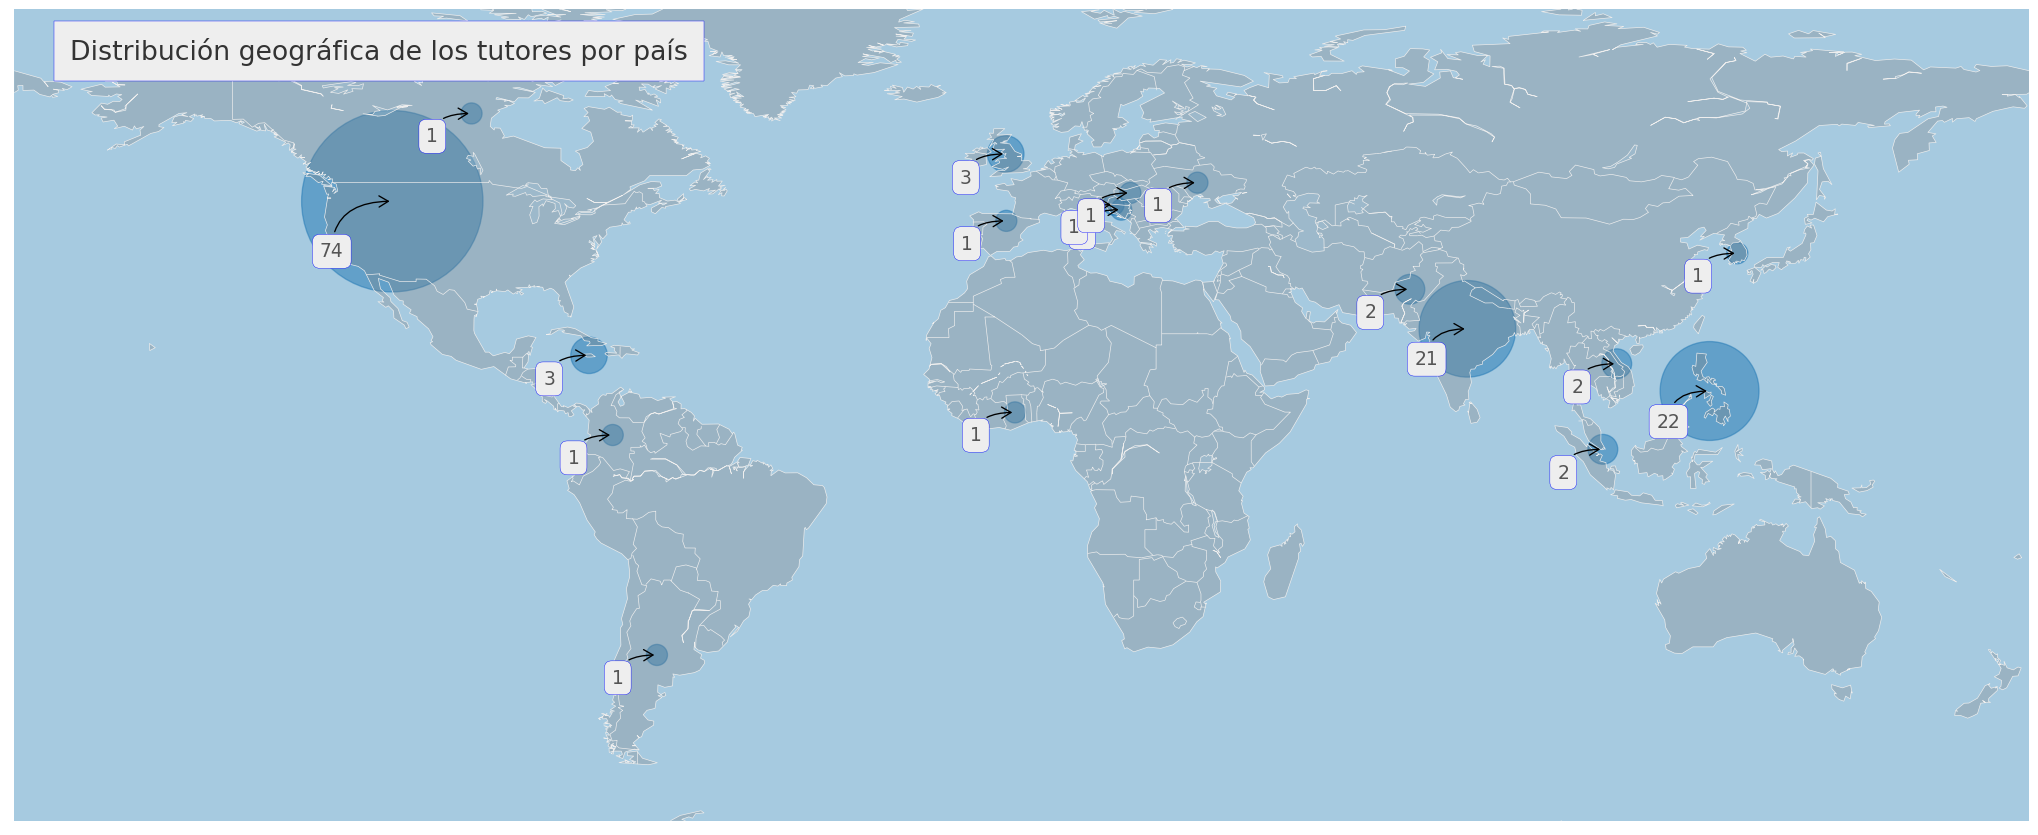

In [65]:
# 6
from mpl_toolkits.basemap import Basemap

# 7
import warnings
warnings.filterwarnings("ignore")

# 8
centroids = pd.read_csv('country_centroids_az8.csv')
df_tutors_by_country_geo = df_tutors_by_country.join(centroids.set_index(['adm0_a3_us']), on = ['country_alpha_3'], how = 'left', rsuffix='_geo')
 
# 9
dpi = 96
plt.figure(figsize=(2600/dpi, 1800/dpi), dpi=dpi)
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#a6cae0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.5, color="#eeeeee")
m.drawcountries(linewidth=0.5, color="#eeeeee")
# Puntos 
m.scatter(df_tutors_by_country_geo['Longitude'], df_tutors_by_country_geo['Latitude'], s=df_tutors_by_country_geo['count']*250, alpha=0.5,  cmap="Set1")

# Estilos de las anotaciones
bbox_round = dict(boxstyle="round,pad=0.4", fc="#eeeeee", ec="b", lw=0.3)
bbox_square = dict(boxstyle="square,pad=0.6", fc="#eeeeee", ec="b", lw=0.3)

arrowprops = dict(
    arrowstyle = "->,head_length=0.5,head_width=0.3",
    connectionstyle = "angle3,angleA=90,angleB=0")

plt.text(-170, 75,'Distribución geográfica de los tutores por país', ha='left', va='top', size=20, color='#333333', bbox=bbox_square )

for index, row in df_tutors_by_country_geo.iterrows():
    plt.annotate(row['count'],xy=(row['Longitude'], row['Latitude']),
                 xytext=(row['Longitude']-8-(row['count']/15), row['Latitude']-5-(row['count']/15)),
                 bbox=bbox_round, arrowprops=arrowprops, color='#555555', size="14")

plt.savefig('tutores.png', bbox_inches='tight')

In [66]:
# 10
df_tutors_by_country_top10 = df_tutors_by_country.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(10)

# 11
n_countries = df_tutors_by_country_geo['country_alpha_3'].count()
df_tutors_by_country_top5 = df_tutors_by_country.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(5)['count'].sum()
df_tutors_by_country_top3 = df_tutors_by_country.sort_values(by=['count'], ascending=False).reset_index(drop=True).head(3)['count'].sum()
print ('Cantidad de países en los que se distribuyen los tutores: {}'.format(n_countries))
print ('Tutores concentrados en los primeros 3 países (USA, IND, PHL): {:.2%}'.format(df_tutors_by_country_top3/n_tutors))
print ('Tutores concentrados en los primeros 5 países (USA, IND, PHL, JAM, GBR): {:.2%}'.format(df_tutors_by_country_top5/n_tutors))

# 12
df_tutors_by_country_more_than_1 = df_tutors_by_country[df_tutors_by_country['count']>1].sort_values(by=['count'], ascending=False).reset_index(drop=True)
n_countries_1_tutor = len(df_tutors_by_country[df_tutors_by_country['count']==1].sort_values(by=['count'], ascending=False).reset_index(drop=True))
row_others = {'country':'Other countries', 'country_alpha_2':'00', 'country_alpha_3':'000','count': n_countries_1_tutor}
df_tutors_by_country_more_than_1 = df_tutors_by_country_more_than_1.append(row_others, ignore_index=True)



Cantidad de países en los que se distribuyen los tutores: 18
Tutores concentrados en los primeros 3 países (USA, IND, PHL): 78.52%
Tutores concentrados en los primeros 5 países (USA, IND, PHL, JAM, GBR): 82.55%


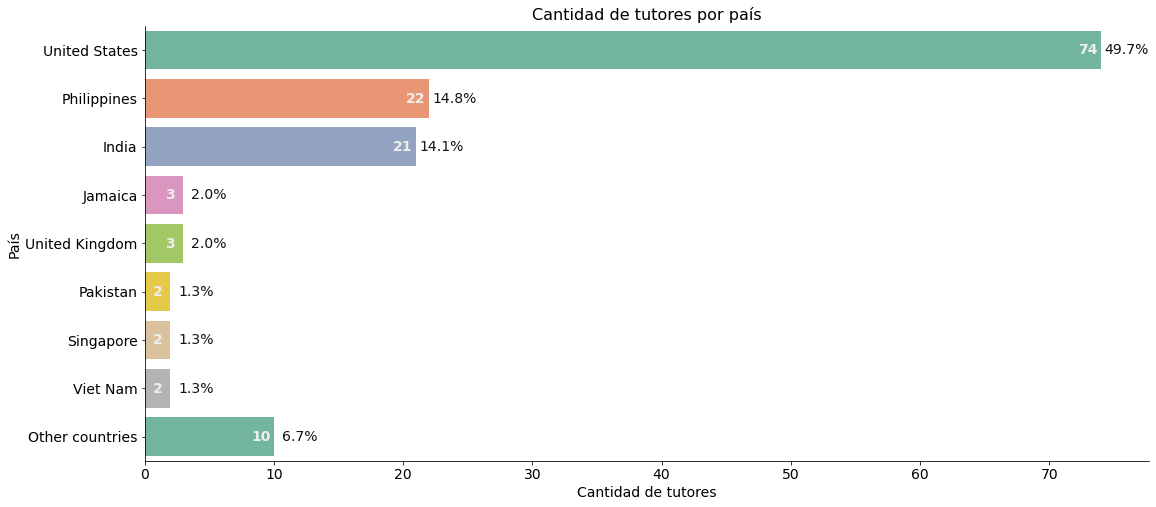

In [67]:
# 13
fig, ax = plt.subplots(figsize=(18,8))
g = sns.barplot(x = df_tutors_by_country_more_than_1['count'], y = df_tutors_by_country_more_than_1['country'], palette='Set2')
ax.set_title('Cantidad de tutores por país', fontsize=16)
plt.grid(False)
plt.xlabel('Cantidad de tutores', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, row in df_tutors_by_country_more_than_1.iterrows():
    g.text(row['count']-0.5 if row['count'] == 1 else row['count']-1, 
           index, row['count'], color='#eeeeee', size=14, weight='bold', ha="center", va="center")

for index, row in df_tutors_by_country_more_than_1.iterrows():
    g.text(row['count']+1 if row['count'] == 1 else row['count']+2, 
           index, '{:.1f}%'.format(row['count']/n_tutors*100), color='#111111', size=14, ha="center", va="center")
    
sns.despine()

### Caracterización de los tutores: Edad

1. Removemos las filas que no contienen información de edad
2. Nos quedamos con la información de la edad de cada tutor 
3. Distribución de la edad de los tutores considerando el total de los tutores


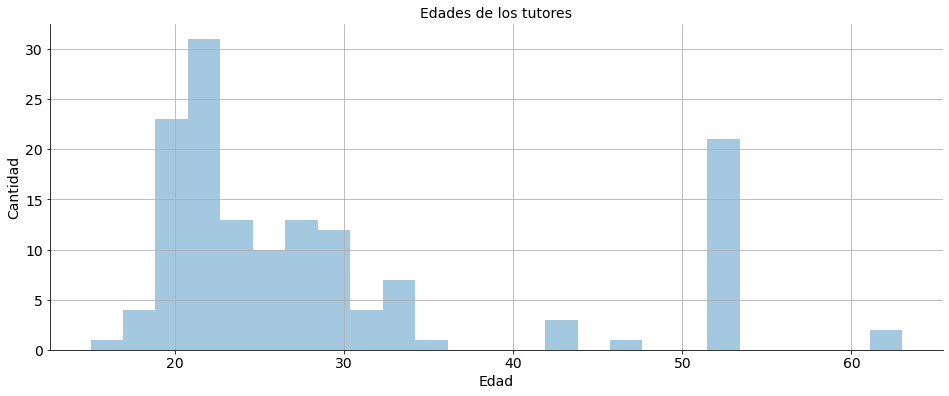

In [68]:
# 1
df_tutors_by_age = df_tutors.dropna(subset=['tutor_age'])

# 2
df_tutors_by_age = df_tutors_by_age.drop_duplicates().sort_values(by='tutor_id')

# 3
plt.figure(figsize=(16,6))
sns.distplot(df_tutors_by_age['tutor_age'], bins=25, kde=False, rug=False).set_title('Edades de los tutores', fontsize=14)
plt.grid(True)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()

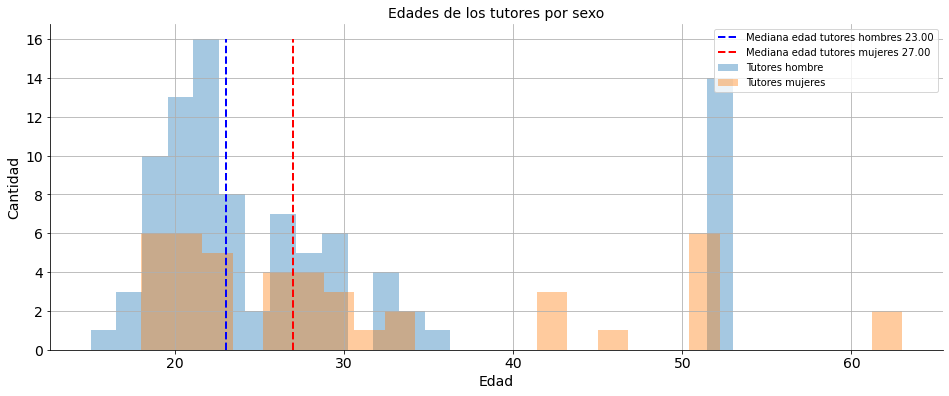

In [69]:
# 4
tutor_male_age = df_tutors_by_age[df_tutors_by_age.tutor_gender == 'male'].tutor_age
tutor_female_age = df_tutors_by_age[df_tutors_by_age.tutor_gender == 'female'].tutor_age

# 5
plt.figure(figsize=(16,6))
sns.distplot(tutor_male_age, bins=25, kde=False, rug=False, label='Tutores hombre')
sns.distplot(tutor_female_age, bins=25, kde=False, rug=False, label='Tutores mujeres').set_title('Edades de los tutores por sexo', fontsize=14)
plt.plot([tutor_male_age.median(), tutor_male_age.median()], [0, 16], '--b', linewidth=2, label=f'Mediana edad tutores hombres {tutor_male_age.median():.2f}')
plt.plot([tutor_female_age.median(), tutor_female_age.median()], [0, 16], '--r', linewidth=2, label=f'Mediana edad tutores mujeres {tutor_female_age.median():.2f}')

plt.grid(True)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)
plt.legend(loc='upper right')
sns.despine()

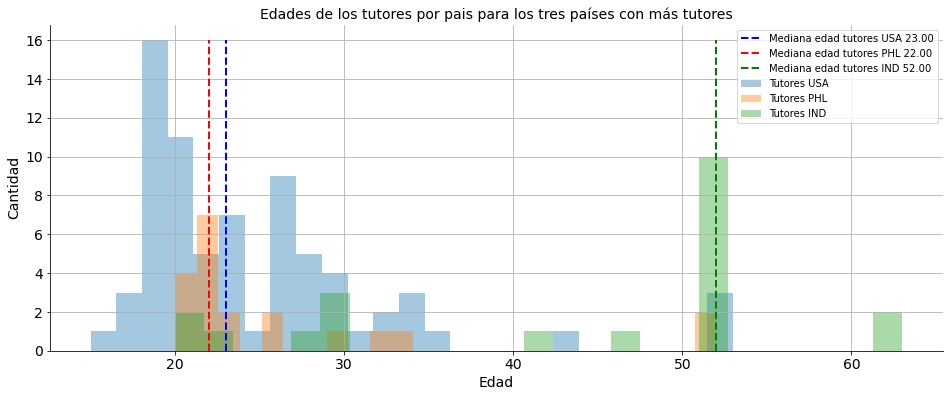

In [70]:
df_tutors_age_country = df_tutors.dropna(how='any',subset=['tutor_age','tutor_last_sign_in_country'],axis=0)
df_tutors_age_country = df_tutors_age_country.drop_duplicates().sort_values(by='tutor_id')

df_tutors_age_country =  df_tutors_age_country[df_tutors['tutor_last_sign_in_country']!='--']

df_tutors_age_country['country'] = df_tutors_age_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).name, axis = 1) 
df_tutors_age_country['country_alpha_3'] = df_tutors_age_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_3, axis = 1) 
df_tutors_age_country['country_alpha_2'] = df_tutors_age_country.apply(lambda row: (pyco.countries.lookup(row.tutor_last_sign_in_country)).alpha_2, axis = 1) 

tutor_usa_age = df_tutors_age_country[df_tutors_age_country.country_alpha_3 == 'USA'].tutor_age
tutor_phl_age = df_tutors_age_country[df_tutors_age_country.country_alpha_3 == 'PHL'].tutor_age
tutor_ind_age = df_tutors_age_country[df_tutors_age_country.country_alpha_3 == 'IND'].tutor_age

plt.figure(figsize=(16,6))
sns.distplot(tutor_usa_age, bins=25, kde=False, rug=False, label='Tutores USA')
sns.distplot(tutor_phl_age, bins=25, kde=False, rug=False, label='Tutores PHL')
sns.distplot(tutor_ind_age, bins=25, kde=False, rug=False, label='Tutores IND').set_title('Edades de los tutores por pais para los tres países con más tutores', fontsize=14)

plt.plot([tutor_usa_age.median(), tutor_usa_age.median()], [0, 16], '--b', linewidth=2, label=f'Mediana edad tutores USA {tutor_usa_age.median():.2f}')
plt.plot([tutor_phl_age.median(), tutor_phl_age.median()], [0, 16], '--r', linewidth=2, label=f'Mediana edad tutores PHL {tutor_phl_age.median():.2f}')
plt.plot([tutor_ind_age.median(), tutor_ind_age.median()], [0, 16], '--g', linewidth=2, label=f'Mediana edad tutores IND {tutor_ind_age.median():.2f}')

plt.grid(True)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=10)
plt.legend(loc='upper right')
sns.despine()

## Análisis

### Limpieza de datos

* Durante la operación de limpieza de los datos advertimos que en el dataset teníamos un $7.51\%$ de tutores cuyo `tutor_id` no está definido. Decidimos removerlos del conjunto de datos para el presente análisis que caracteriza a los tutores

* Encontramos también valores nulos en otras variables de interés para el análisis. Decidimos dar tratamiento a esos valores nulos en para cada análisis particular, sin removerlos por completo del conjunto de datos.

### Caracterización de los tutores

* se evidencia que de un total de 136 tutores más del $68\%$ son hombres

* Los tutores están distribuidos en 18 países, pero se observa que casi el $80\%$ está concentrado en 3 países: USA, India y Filipinas, y mas de la mitad están en un solo país: USA.

* Sobre la distribución etaria observamos que, considerando el total de los tutores, los valores se concentran alrededor de los 22 y de los 52 años de edad 

* Si consideramos la edad con respecto al género se observa que, en general, los tutores hombres son más jovenes que sus colegas mujeres. La mediana de la edad de hombres y mujeres son 23 y 27 años respectivamente.

* Analizando la distribución etaria de los tres paises principales vemos que las edades de los valores de las edades de USA y Filipinas se distribuyen alrededor de los 22 y 23 años, mientras que los de los tutores de India lo hacen alrededor de los 52 años, lo cual explica las dos tendencias que se obervan a nivel general
